## Project: NYPD Arrests in 2019<br>
Gerald Steven<br>
Data source: https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc<br>
3/27/20

## Part 1: Data cleaning
1. Check for missing values
2. Check for duplicate records
3. Drop unnecessary columns
4. Replace values
5. Convert data type

## Part 2: Data visualization and analysis
1. What is the most common reason for arrest in New York?
2. Which borough has the highest number of arrests?
3. When are most arrests made?
4. Is there racial bias in NYPD arrests?

## Pre-step: Load the data

Load CSV file into a dataframe.

In [1]:
import pandas as pd
import os

In [2]:
csv_fpath = os.path.expanduser('~/personal_project/NYPD_Arrest_Data__Year_to_Date_.csv')
nypd = pd.read_csv(csv_fpath)
nypd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,206892169,12/31/2019,907.0,"IMPAIRED DRIVING,DRUG",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U4,M,M,33,0,25-44,M,WHITE,1000916,245710,40.841085,-73.939769
1,206888084,12/31/2019,739.0,"FRAUD,UNCLASSIFIED-FELONY",112.0,THEFT-FRAUD,PL 1908301,F,Q,101,0,25-44,M,BLACK HISPANIC,1055868,156522,40.596012,-73.742116
2,206890433,12/31/2019,122.0,"HOMICIDE, NEGLIGENT, VEHICLE,",102.0,HOMICIDE-NEGLIGENT-VEHICLE,PL 1251201,F,M,23,0,18-24,M,BLACK,997462,227024,40.789803,-73.952289
3,206890441,12/31/2019,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,S,120,0,18-24,M,BLACK,962822,174282,40.645023,-74.077217
4,206890973,12/31/2019,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,25,97,25-44,M,BLACK,1004138,226326,40.787875,-73.928182


Count the total number of records to get an estimate of how large the dataframe is.

In [3]:
nypd.shape

(214617, 18)

## Part 1: Data cleaning
## Check for missing values

In [4]:
nypd.isnull().values.any()

True

The code above returns True, which confirms that there are missing values in the dataframe. We can check the sum of these missing values by running the cell below:

In [5]:
nypd.isnull().values.sum()

1887

Although 1887 values seem like a lot, this number is still relatively small considering that there are over 200,000 records in the dataframe. We can still delete these records so that we are only analyzing on valid records with no missing values.

In [6]:
nypd.dropna(axis = 0, how = "any", inplace = True)
len(nypd)

213089

After deleting records with NaN values, our dataframe now contains 213,089 records. I used 'how = "any"' to delete an entire record if any NaN values are present.

In [7]:
#TEST
nypd.isnull().values.any()

False

## Check for duplicate records

We can check for duplicate records by using pd.DataFrame.duplicated. Because each 'ARREST_KEY' is supposed to be unique, we can just check that specific column for any duplicated values in the dataframe. The code below returns False, which indicates that all 213,089 records are unique.

In [8]:
nypd['ARREST_KEY'].duplicated().any()

False

## Drop unnecessary columns

Our current dataframe contains 18 columns. A description of what each column represents is available on the website listed on the top of this notebook. Although each column has a specific purpose, we can drop the columns that are not relevant for our analysis. <br>

For our purposes, I will be deleting 7 columns: 'KY_CD', 'OFNS_DESC', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', and 'Longitude'. 'KY_CD' and 'OFNS_DESC' are similar to 'PD_CD' and 'PD_DESC'; 'PD_CD' and 'KY_CD' are a three digit code, and 'PD_DESC' and 'OFNS_DESC' are descriptions that correspond to their three digit code. The only difference is that 'KY_CD' and 'OFNS_DESC' are more general than 'PD_CD' and 'PD_DESC', so it might be more helpful to keep the values that are more specific.

In [9]:
nypd.drop(columns=['KY_CD', 'OFNS_DESC', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude','Longitude'], inplace=True)
nypd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,206892169,12/31/2019,907.0,"IMPAIRED DRIVING,DRUG",VTL11920U4,M,M,33,25-44,M,WHITE
1,206888084,12/31/2019,739.0,"FRAUD,UNCLASSIFIED-FELONY",PL 1908301,F,Q,101,25-44,M,BLACK HISPANIC
2,206890433,12/31/2019,122.0,"HOMICIDE, NEGLIGENT, VEHICLE,",PL 1251201,F,M,23,18-24,M,BLACK
3,206890441,12/31/2019,268.0,CRIMINAL MIS 2 & 3,PL 1450502,F,S,120,18-24,M,BLACK
4,206890973,12/31/2019,101.0,ASSAULT 3,PL 1200001,M,M,25,25-44,M,BLACK


Now our dataframe only has 11 columns.

## Replace values

Replace values in certain columns for readability.

In [10]:
nypd['ARREST_BORO'].replace(['M','B','K','Q','S'],['MANHATTAN','BRONX','BROOKLYN','QUEENS','STATEN ISLAND'], inplace=True)
nypd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,206892169,12/31/2019,907.0,"IMPAIRED DRIVING,DRUG",VTL11920U4,M,MANHATTAN,33,25-44,M,WHITE
1,206888084,12/31/2019,739.0,"FRAUD,UNCLASSIFIED-FELONY",PL 1908301,F,QUEENS,101,25-44,M,BLACK HISPANIC
2,206890433,12/31/2019,122.0,"HOMICIDE, NEGLIGENT, VEHICLE,",PL 1251201,F,MANHATTAN,23,18-24,M,BLACK
3,206890441,12/31/2019,268.0,CRIMINAL MIS 2 & 3,PL 1450502,F,STATEN ISLAND,120,18-24,M,BLACK
4,206890973,12/31/2019,101.0,ASSAULT 3,PL 1200001,M,MANHATTAN,25,25-44,M,BLACK


Replace values in the LAW_CAT_CD column

In [11]:
nypd['LAW_CAT_CD'].replace(['F','M','V'],['FELONY','MISDEMEANOR','VIOLATION'], inplace=True)
nypd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,206892169,12/31/2019,907.0,"IMPAIRED DRIVING,DRUG",VTL11920U4,MISDEMEANOR,MANHATTAN,33,25-44,M,WHITE
1,206888084,12/31/2019,739.0,"FRAUD,UNCLASSIFIED-FELONY",PL 1908301,FELONY,QUEENS,101,25-44,M,BLACK HISPANIC
2,206890433,12/31/2019,122.0,"HOMICIDE, NEGLIGENT, VEHICLE,",PL 1251201,FELONY,MANHATTAN,23,18-24,M,BLACK
3,206890441,12/31/2019,268.0,CRIMINAL MIS 2 & 3,PL 1450502,FELONY,STATEN ISLAND,120,18-24,M,BLACK
4,206890973,12/31/2019,101.0,ASSAULT 3,PL 1200001,MISDEMEANOR,MANHATTAN,25,25-44,M,BLACK


## Convert data type

I noticed that all values in the PD_CD column are stored as floats. However, all unique values of this column have a decimal point of 0. We can confirm this by printing all the unique values of this column. 

In [12]:
nypd['PD_CD'].unique()

array([907., 739., 122., 268., 101., 175., 503., 759., 112., 244., 339.,
       114., 259., 922., 397., 105., 113., 269., 779., 782., 750., 793.,
       905., 203., 748., 847., 511., 969., 109., 439., 707., 223., 104.,
       139., 792., 705., 117., 744., 862., 639., 205., 729., 799., 494.,
       507., 510., 681., 419., 179., 441., 462., 718., 106., 478., 764.,
       698., 157., 505., 254., 490., 643., 258., 198., 849., 848., 787.,
       168., 904., 633., 125., 466., 461., 514., 209., 708., 263., 181.,
       199., 961., 493., 115., 918., 916., 509., 641., 781., 760., 515.,
       567., 508., 273., 569., 502., 802., 475., 544., 661., 568., 585.,
       766., 479., 640., 563., 565., 521., 809., 725., 293., 940., 957.,
       570., 177., 665., 409., 201., 164., 625., 129., 301., 812., 596.,
       874., 649., 817., 477., 566., 878., 512., 808., 185., 501., 500.,
       746., 195., 180., 176., 553., 909., 291., 586., 174., 696., 289.,
       775., 879., 697., 204., 733., 594., 153., 87

Because all values in this column have a decimal point of 0, it would not hurt to convert the data type of this column from float to int.

In [13]:
nypd = nypd.astype({'PD_CD':'int64'})
nypd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,206892169,12/31/2019,907,"IMPAIRED DRIVING,DRUG",VTL11920U4,MISDEMEANOR,MANHATTAN,33,25-44,M,WHITE
1,206888084,12/31/2019,739,"FRAUD,UNCLASSIFIED-FELONY",PL 1908301,FELONY,QUEENS,101,25-44,M,BLACK HISPANIC
2,206890433,12/31/2019,122,"HOMICIDE, NEGLIGENT, VEHICLE,",PL 1251201,FELONY,MANHATTAN,23,18-24,M,BLACK
3,206890441,12/31/2019,268,CRIMINAL MIS 2 & 3,PL 1450502,FELONY,STATEN ISLAND,120,18-24,M,BLACK
4,206890973,12/31/2019,101,ASSAULT 3,PL 1200001,MISDEMEANOR,MANHATTAN,25,25-44,M,BLACK


## Part 2: Data visualization and analysis

Now that our dataframe is cleaned, we can explore trends in the dataset using code and visualization.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

## What is the most common reason for arrest in New York?

In [15]:
nypd['PD_DESC'].value_counts()

ASSAULT 3                         24513
LARCENY,PETIT FROM OPEN AREAS,    21568
TRAFFIC,UNCLASSIFIED MISDEMEAN    13624
ASSAULT 2,1,UNCLASSIFIED          11498
ROBBERY,OPEN AREA UNCLASSIFIED     9235
                                  ...  
TERRORISM PROVIDE SUPPORT             1
NUISANCE, CRIMINAL                    1
FIREWORKS PREV CONV 5 YEARS           1
HIND PROSEC. TERR 2                   1
ROBBERY,GAS STATION                   1
Name: PD_DESC, Length: 252, dtype: int64

We can graph the top 5 reasons for arrest.

In [16]:
nypd['PD_DESC'].value_counts().head(5)

ASSAULT 3                         24513
LARCENY,PETIT FROM OPEN AREAS,    21568
TRAFFIC,UNCLASSIFIED MISDEMEAN    13624
ASSAULT 2,1,UNCLASSIFIED          11498
ROBBERY,OPEN AREA UNCLASSIFIED     9235
Name: PD_DESC, dtype: int64

Create a dataframe that stores the total number of arrests for the top 5 reasons.

In [18]:
nypd_top_5 = nypd['PD_DESC'].value_counts().head(5).to_frame()
nypd_top_5.columns = ['Count']
nypd_top_5

,Count
ASSAULT 3,24513
"LARCENY,PETIT FROM OPEN AREAS,",21568
"TRAFFIC,UNCLASSIFIED MISDEMEAN",13624
"ASSAULT 2,1,UNCLASSIFIED",11498
"ROBBERY,OPEN AREA UNCLASSIFIED",9235


Plot using a bar chart.

[Text(0, 0, 'ASSAULT 3'),
 Text(0, 0, 'LARCENY, PETIT FROM OPEN AREAS'),
 Text(0, 0, 'TRAFFIC, UNCLASSIFIED MISDEMEANOR'),
 Text(0, 0, 'ASSAULT 2,1'),
 Text(0, 0, 'ROBBERY, OPEN AREA')]

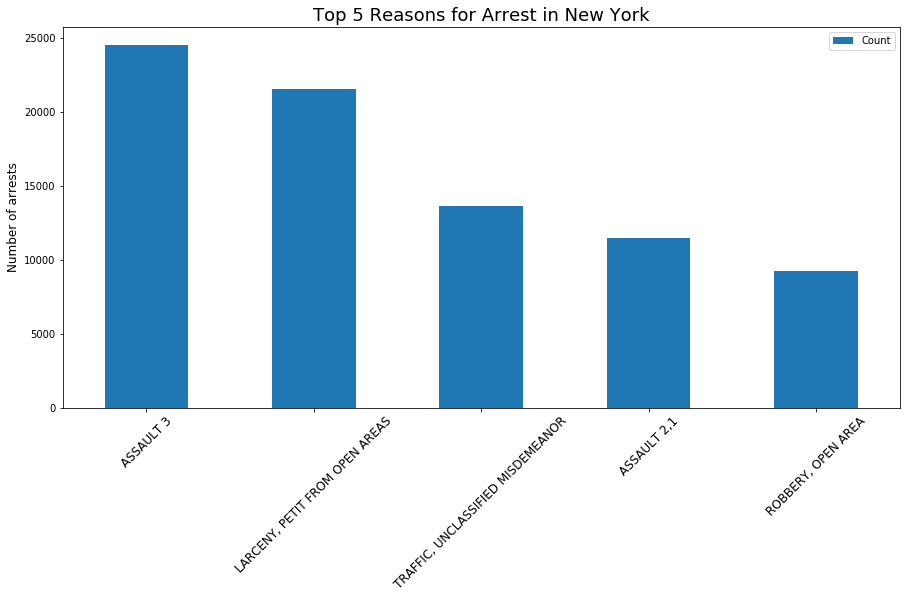

In [22]:
ax = nypd_top_5.plot(kind = 'bar', figsize = (15,7))
ax.set_title("Top 5 Reasons for Arrest in New York", fontsize=18)
ax.set_ylabel("Number of arrests", fontsize=12);
ax.set_xticklabels(['ASSAULT 3', 'LARCENY, PETIT FROM OPEN AREAS', 'TRAFFIC, UNCLASSIFIED MISDEMEANOR', 
                    'ASSAULT 2,1', 'ROBBERY, OPEN AREA'], rotation=45, fontsize=12)

## Which borough has the highest number of arrests?

In [24]:
nypd['ARREST_BORO'].value_counts()

BROOKLYN         58077
MANHATTAN        53172
BRONX            48516
QUEENS           44329
STATEN ISLAND     8995
Name: ARREST_BORO, dtype: int64

In [25]:
boroughs = ['BROOKLYN', 'MANHATTAN', 'BRONX','QUEENS','STATEN ISLAND']
boroughs_count = [58077, 53172, 48516, 44329, 8995]

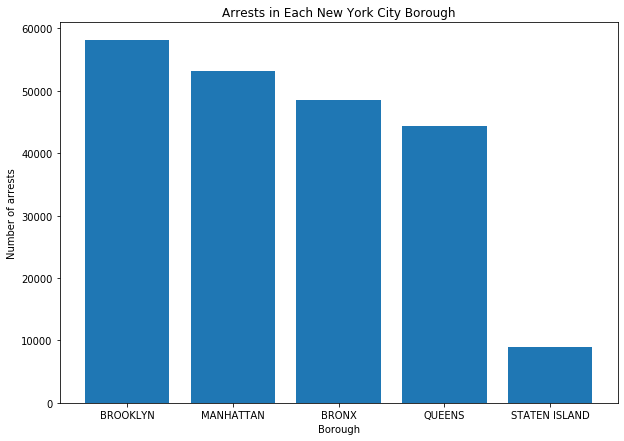

In [26]:
plt.figure(figsize = (10, 7))
plt.bar(x = boroughs, height = boroughs_count)
plt.title('Arrests in Each New York City Borough')
plt.ylabel('Number of arrests')
plt.xlabel('Borough')
plt.rcParams.update({'font.size': 12})
#plt.show()

## When are most arrests made?

We can compute the monthly statistics of arrests in New York in 2019. With this information, we can plot the distribution of monthly count of arrests. First, we would need to create a month column.

In [27]:
nypd['MONTH'] = nypd['ARREST_DATE'].str[0:2]
nypd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,MONTH
0,206892169,12/31/2019,907,"IMPAIRED DRIVING,DRUG",VTL11920U4,MISDEMEANOR,MANHATTAN,33,25-44,M,WHITE,12
1,206888084,12/31/2019,739,"FRAUD,UNCLASSIFIED-FELONY",PL 1908301,FELONY,QUEENS,101,25-44,M,BLACK HISPANIC,12
2,206890433,12/31/2019,122,"HOMICIDE, NEGLIGENT, VEHICLE,",PL 1251201,FELONY,MANHATTAN,23,18-24,M,BLACK,12
3,206890441,12/31/2019,268,CRIMINAL MIS 2 & 3,PL 1450502,FELONY,STATEN ISLAND,120,18-24,M,BLACK,12
4,206890973,12/31/2019,101,ASSAULT 3,PL 1200001,MISDEMEANOR,MANHATTAN,25,25-44,M,BLACK,12


Then, create a dataframe that stores the total number of arrests for every month.

In [28]:
monthly_count = nypd.groupby(['MONTH']).agg({'PD_CD':'count'})
monthly_count.columns = ['Count']
monthly_count

,Count
MONTH,
01,19945
02,17579
03,19566
04,19059
05,19459
06,17330
07,19437
08,17975
09,16536


Plot the dataframe above using a line plot.

(0, 25000)

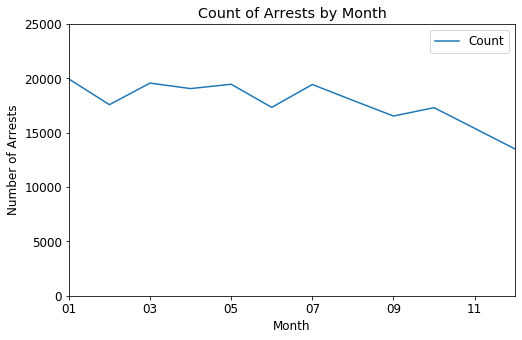

In [29]:
ax2 = monthly_count.plot(kind = 'line', figsize = (8,5))
ax2.set_xlabel("Month")
ax2.set_ylabel("Number of Arrests")
ax2.set_title("Count of Arrests by Month")
plt.xlim(0,None)
plt.ylim(0, 25000)

Surprisingly, there is a decrease in arrests during the months of November and December. My hypothesis is that there is a decrease in arrests during these two months because November and December are traditionally considered to be the holiday season. To confirm if this hypothesis is valid, we can take a closer look at the month of December.

In [30]:
december = nypd[nypd['MONTH'] == '12']
december.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,MONTH
0,206892169,12/31/2019,907,"IMPAIRED DRIVING,DRUG",VTL11920U4,MISDEMEANOR,MANHATTAN,33,25-44,M,WHITE,12
1,206888084,12/31/2019,739,"FRAUD,UNCLASSIFIED-FELONY",PL 1908301,FELONY,QUEENS,101,25-44,M,BLACK HISPANIC,12
2,206890433,12/31/2019,122,"HOMICIDE, NEGLIGENT, VEHICLE,",PL 1251201,FELONY,MANHATTAN,23,18-24,M,BLACK,12
3,206890441,12/31/2019,268,CRIMINAL MIS 2 & 3,PL 1450502,FELONY,STATEN ISLAND,120,18-24,M,BLACK,12
4,206890973,12/31/2019,101,ASSAULT 3,PL 1200001,MISDEMEANOR,MANHATTAN,25,25-44,M,BLACK,12


Similarly, we can create a dataframe and then plot.

In [31]:
december_count = december.groupby(['ARREST_DATE']).agg({'PD_CD':'count'})
december_count.columns = ['Count']
december_count

,Count
ARREST_DATE,
12/01/2019,334
12/02/2019,347
12/03/2019,606
12/04/2019,697
12/05/2019,689
12/06/2019,575
12/07/2019,403
12/08/2019,384
12/09/2019,370


(0, 750)

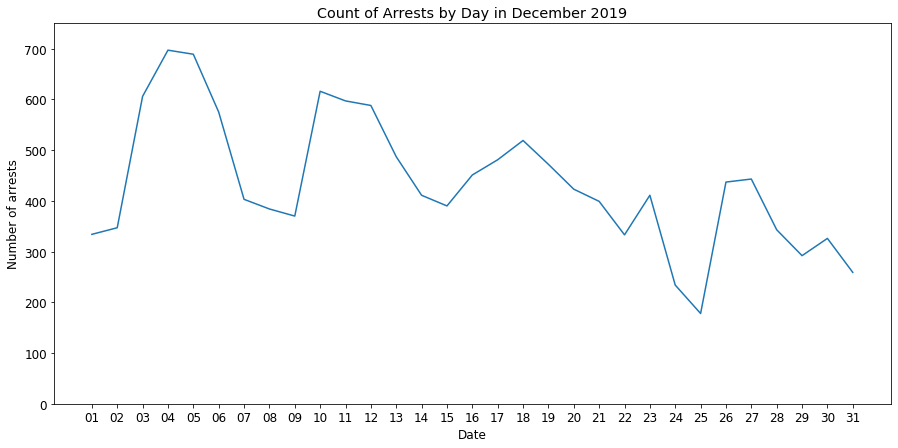

In [35]:
plt.figure(figsize = (15, 7))
ax3 = sns.lineplot(x = december_count.index.str[3:5], y = 'Count', data = december_count)
ax3.set_xlabel("Date")
ax3.set_ylabel("Number of arrests")
ax3.set_title("Count of Arrests by Day in December 2019")
plt.ylim(0, 750)

Confirming my earlier hypothesis of lower arrest numbers during the holiday season, the average number of arrests on any given day in December 2019 is 435. But on December 25th 2019 (Christmas Day), there were only 178 arrests, which is also the lowest number of arrests for the month of December.

In [32]:
december_count.mean(), december_count.min()

(Count    435.322581
 dtype: float64, Count    178
 dtype: int64)

Knowing that Christmas Day had the lowest number of arrests in December, I wanted to know if this minimum is also the minimum for the entire year. To check for that, we can groupby the dataframe by each day again and find the min.

In [42]:
nypd_annual_min = nypd.groupby(['ARREST_DATE']).agg({'PD_CD':'count'})
nypd_annual_min.columns = ['Count']
nypd_annual_min.min()

Count    178
dtype: int64

As it turns out, the minimum number of arrest for the entire year of 2019 is also 178. To be sure that this min is also the same as Christmas Day, we can find the index, which confirms that this min is indeed December 25th.

In [34]:
index_label = nypd_annual_min.query('Count == 178').index.tolist()
print(index_label)

['12/25/2019']


We can also create a distribution plot of total number of arrests by day.

In [36]:
daily_count = nypd.groupby(['ARREST_DATE']).agg({'PD_CD':'count'})
daily_count.columns = ['Count']
daily_count.head()

,Count
ARREST_DATE,
01/01/2019,547
01/02/2019,727
01/03/2019,802
01/04/2019,776
01/05/2019,522


Interestingly, the distribution plot does not show a normal distribution of a bell curve. Instead, there are two peaks in this distribution. This feature might be worth looking into for further exploration; to find out if this is just a feature of the data or if there is actually a coding error.

Text(0.5, 1.0, 'Distribution of Arrests in New York')

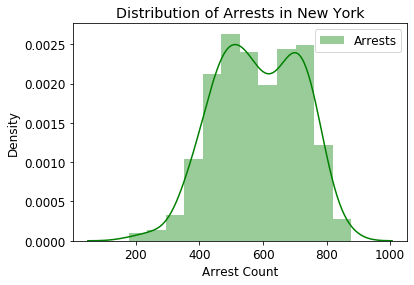

In [37]:
ax2 = sns.distplot(daily_count, color = "green", label = "Arrests")
plt.legend()
ax2.set_xlabel("Arrest Count")
ax2.set_ylabel("Density")
ax2.set_title("Distribution of Arrests in New York")

We can compare the distribution above with the mean of the data (the average number of arrests on any given day in 2019).

In [38]:
daily_count.describe()

,Count
count,365.000000
mean,583.805479
std,132.562272
min,178.000000
25%,479.000000
50%,579.000000
75%,697.000000
max,877.000000


## Is there racial bias in NYPD arrests?

Last year, I took an Intro to Political Psychology class, where we learned about a racial bias and police shootings. We read about a psychology experiment on racial bias and police shootings (Correll et al 2007), where the subjects (police officers) were asked to participate in the shooter's dilemma game. 

In the shooter's dilemma, participants are exposed to a series of armed and unarmed individuals who appear in the context of a variety of background images. Participants are instructed that any armed target are an imminent threat and should be shot as quickly as possible, while unarmed individuals pose no threat and should be flagged by pressing a different key. Individuals presented are a mix of white and black men.

The aim of the study was to find if there was an overall bias toward shooting or not shooting, and does it vary by race? The experiment's result indicated that participants, when shooting, shot black individuals more quickly than white individuls, and when participants decided not to shoot, they responded more quickly for white individuals than for black individuals.

I want to explore the idea if we can infer racial bias with NYPD's arrests in 2019. 

In [39]:
nypd_race = nypd['PERP_RACE'].value_counts().to_frame()
nypd_race.columns = ['Count']
nypd_race

,Count
BLACK,101979
WHITE HISPANIC,53265
WHITE,25284
BLACK HISPANIC,18550
ASIAN / PACIFIC ISLANDER,12013
UNKNOWN,1401
AMERICAN INDIAN/ALASKAN NATIVE,597


Out of the 213,089 arrests in 2019, almost half of them were arrests on black individuals (~47.8% of all arrests were on black individuals to be exact). We can visualize this information using a bar chart.

[Text(0, 0, 'BLACK'),
 Text(0, 0, 'WHITE HISPANIC'),
 Text(0, 0, 'WHITE'),
 Text(0, 0, 'BLACK HISPANIC'),
 Text(0, 0, 'ASIAN / PACIFIC ISLANDER'),
 Text(0, 0, 'UNKNOWN'),
 Text(0, 0, 'AMERICAN INDIAN / ALASKAN NATIVE')]

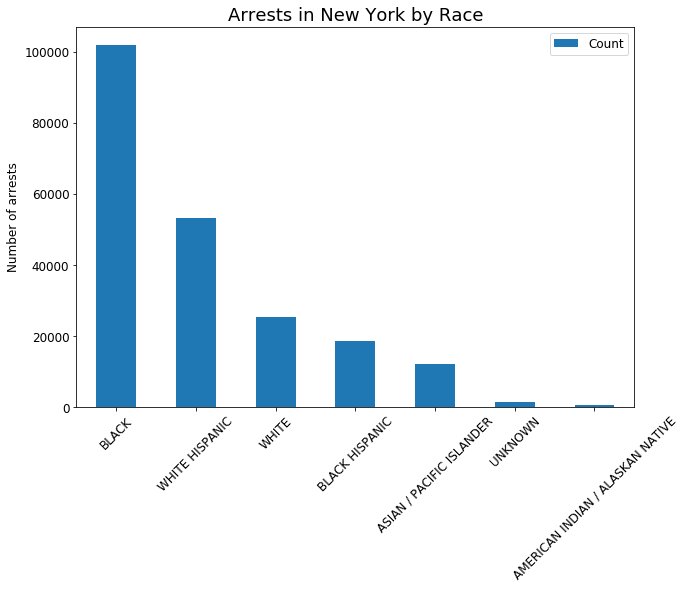

In [40]:
ax4 = nypd_race.plot(kind = 'bar', figsize = (10,7))
ax4.set_title("Arrests in New York by Race", fontsize=18)
ax4.set_ylabel("Number of arrests", fontsize=12);
ax4.set_xticklabels(['BLACK', 'WHITE HISPANIC', 'WHITE', 'BLACK HISPANIC', 'ASIAN / PACIFIC ISLANDER', 
                    'UNKNOWN', 'AMERICAN INDIAN / ALASKAN NATIVE'], rotation=45, fontsize=12)

Because this dataset is not a psychology experiment, we cannot exactly conclude that there is racial bias in NYPD arrests. We would need more information in order to determine this causality! We can, however, confirm that the trend of NYPD arrests follows the findings from the racial bias and police shootings experiment in 2007; that there is racial bias towards black individuals. In the psychology experiment, police offers when shooting, would shoot faster on black individuals than white individuals. In this dataset, almost half of all arrests made by NYPD were arrests on black individuals.